## Importing libraries

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.model_selection import GridSearchCV

## Reading the dataset

In [159]:
edu_df=pd.read_csv("Leads X Education.csv")

### Dataset preview

In [160]:
edu_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Attribute names

In [161]:
edu_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Number of rows, columns

In [162]:
edu_df.shape

(9240, 37)

## dataset summary

In [163]:
edu_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### check for Missing values (MV)

In [164]:
edu_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [165]:
# changing the select values to null because , select was entered when the user did not respond to that question
edu_df=edu_df.applymap(lambda x:np.NAN if x=='Select' else x)

In [166]:
edu_df['Specialization'].isnull().sum()*100/edu_df.shape[0]                   #more than 36% null values

36.58008658008658

In [167]:
edu_df['Specialization'].value_counts(normalize=True).head()


Finance Management           0.166553
Human Resource Management    0.144710
Marketing Management         0.143003
Operations Management        0.085836
Business Administration      0.068771
Name: Specialization, dtype: float64

### frequency of each specialisation

c:\users\vinayak  r pai\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


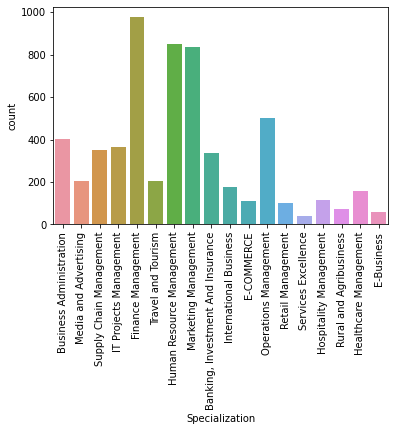

In [168]:
sns.countplot(edu_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

### handling MV in specialization column

c:\users\vinayak  r pai\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


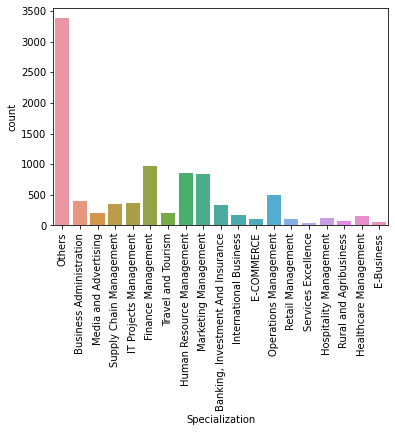

In [169]:
# imputation process. Imputing the null values with others, 
#as the lead may be student or not in any of the above mentioned specialisation
edu_df['Specialization'].replace({np.NAN:'Others'},inplace=True)
sns.countplot(edu_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [170]:
edu_df.drop('How did you hear about X Education',axis=1,inplace=True)      # attribute not required

In [171]:
edu_df['What is your current occupation'].value_counts()                   

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

### handling MV in occupation

In [172]:
# imputing null values with 'unemployed'
edu_df['What is your current occupation'].fillna('Unemployed',inplace=True)
edu_df['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [173]:
a=edu_df['What matters most to you in choosing a course'].value_counts(normalize=True)*100
a

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

### handling MV in choosing a course

In [174]:
edu_df['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)
edu_df['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [175]:
# irrelevant attributes
x=['Country','Prospect ID','Lead Origin','Lead Source','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
for i in x:
    edu_df.drop(i,axis=1,inplace=True)

In [176]:
edu_df['Tags'].unique()      # different values for Tags attribute

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [177]:
tag=edu_df['Tags'].value_counts()
tag

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

### handling MV in Tags attribute

In [178]:
edu_df['Tags'].replace({np.nan:tag.index[0]},inplace=True)
edu_df['Tags'].value_counts().head()

Will revert after reading the email    5425
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Name: Tags, dtype: int64

In [179]:
edu_df.drop('City',axis=1,inplace=True)            # attribute not reuqired 


In [180]:
edu_df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [181]:
# as Lead quality is an important column , it would be better to impute null values as not sure than dropping the column

In [182]:
edu_df['Lead Quality'].fillna('Not Sure',inplace=True)
edu_df['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [183]:
null_val=round(edu_df.isnull().sum()*100/edu_df.shape[0],3)
null_val

Lead Number                                       0.000
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Specialization                                    0.000
What is your current occupation                   0.000
What matters most to you in choosing a course     0.000
Search                                            0.000
Magazine                                          0.000
Newspaper Article                                 0.000
X Education Forums                                0.000
Newspaper                                         0.000
Digital Advertisement                             0.000
Through Recommendations                         

In [184]:
# dropping leads profile as it contains more than 70% of the values missing
edu_df.drop('Lead Profile',axis=1,inplace=True)

In [185]:
edu_df.drop('Asymmetrique Activity Index',axis=1,inplace=True)      # attribute not required

In [186]:
null_values=edu_df.isna().sum()*100/edu_df.shape[0]
null_values[null_values>0]

TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
dtype: float64

#### dropping the remaining null_values rows

In [187]:

edu_df.dropna(inplace=True)

## visualising current occupations

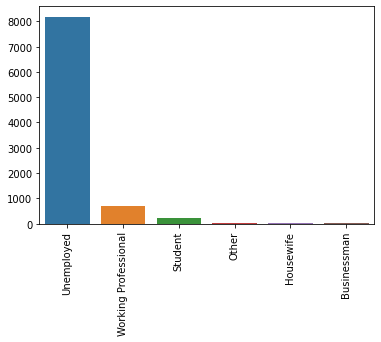

In [188]:

employment=edu_df['What is your current occupation'].value_counts()
sns.barplot(x=employment.index,y=employment.values)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

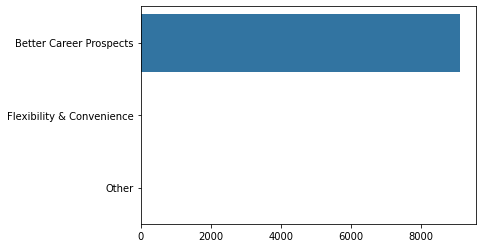

In [189]:
# visualising 'What matters most to you in choosing a course'
imp=edu_df['What matters most to you in choosing a course'].value_counts()
sns.barplot(y=imp.index,x=imp.values)


c:\users\vinayak  r pai\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


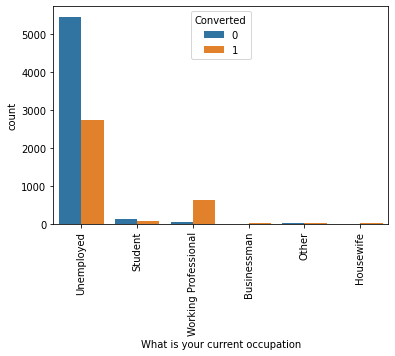

In [190]:
#INDICATES Unemployed get converted as lead most often

sns.countplot(edu_df['What is your current occupation'],hue=edu_df['Converted'])
plt.xticks(rotation=90)
plt.show()

In [191]:
# Cheking the lead conversion rate 
edu_df['Converted'].sum()*100/len(edu_df['Converted'])

38.02043282434362

## Treating Outliers

c:\users\vinayak  r pai\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\vinayak  r pai\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\vinayak  r pai\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments w

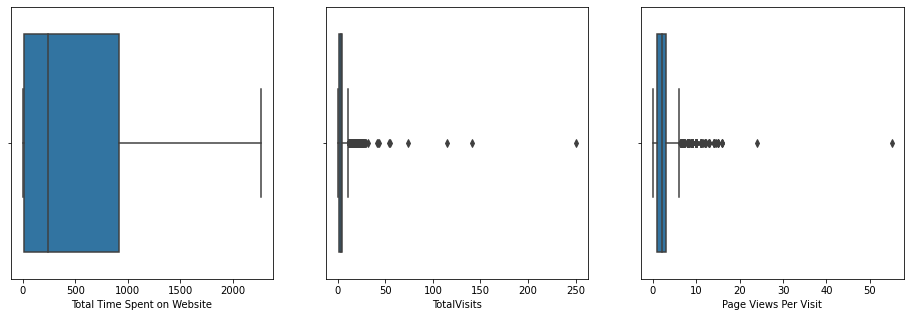

In [192]:
num_cols=['Total Time Spent on Website','TotalVisits','Page Views Per Visit']
plt.figure(figsize=[16,5])
j=1
for i in num_cols:
    plt.subplot(1,3,j)
    sns.boxplot(edu_df[i])
    j+=1
plt.show()

### Handling outliers

In [193]:

edu_df[num_cols[1:]].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [194]:

print('For',num_cols[1])
edu_df[num_cols[1]].quantile([0,0.1,0.5,0.25,0.5,0.75,0.8,0.9,0.95,0.99])

For TotalVisits


0.00     0.0
0.10     0.0
0.50     3.0
0.25     1.0
0.50     3.0
0.75     5.0
0.80     5.0
0.90     7.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

### checking for various quantiles

In [195]:
# checking for various quantiles
print('For',num_cols[2])
edu_df[num_cols[2]].quantile([0,0.1,0.5,0.25,0.5,0.75,0.8,0.9,0.95,0.99])

For Page Views Per Visit


0.00    0.0
0.10    0.0
0.50    2.0
0.25    1.0
0.50    2.0
0.75    3.0
0.80    4.0
0.90    5.0
0.95    6.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64

### outlier handling for TotlaVisits

In [196]:

Q1=edu_df['TotalVisits'].quantile(0.05)
Q3=edu_df['TotalVisits'].quantile(0.95)

IQR=Q3-Q1

edu_df=edu_df[(edu_df['TotalVisits']>=Q1-1.5*IQR) & (edu_df['TotalVisits']<=Q3+1.5*IQR)]

### Outlier Handling for 'Page Views Per Visit'

In [197]:

Q1=edu_df['Page Views Per Visit'].quantile(0.05)
Q3=edu_df['Page Views Per Visit'].quantile(0.95)

IQR=Q3-Q1

edu_df=edu_df[(edu_df['Page Views Per Visit']>=Q1-1.5*IQR) & (edu_df['Page Views Per Visit']<=Q3+1.5*IQR)]

In [198]:
edu_df.shape

(9077, 26)

# Multivaraite analysis

In [199]:
# create a correlation 
edu_corr=edu_df.corr()
edu_corr

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.023491,0.040873,0.019137,0.060348
Converted,0.023491,1.000000,0.048948,0.355315,0.000231
TotalVisits,0.040873,0.048948,1.000000,0.330813,0.690456
Total Time Spent on Website,0.019137,0.355315,0.330813,1.000000,0.338246
Page Views Per Visit,0.060348,0.000231,0.690456,0.338246,1.000000


### heatmap

<AxesSubplot:>

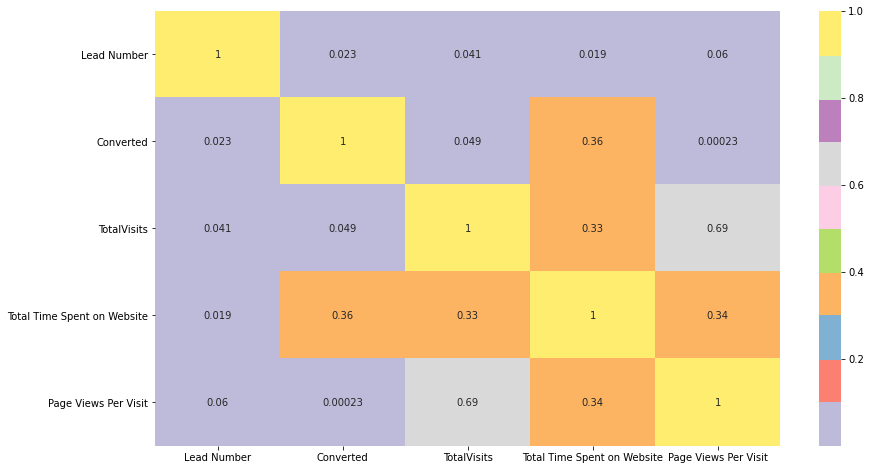

In [200]:
plt.figure(figsize=[14,8])
sns.heatmap(edu_corr,annot=True,cmap='Set3',center=0.4)

In [201]:
# dropping unrequired attribute
edu_df.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement'],axis=1,inplace=True)

In [202]:
map_col=['Do Not Email','Do Not Call','Through Recommendations','Receive More Updates About Our Courses','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Update me on Supply Chain Content']
for i in map_col:
    edu_df[i]=edu_df[i].apply(lambda x:1 if x.lower()=='yes' else 0)

In [203]:
# categorical columns
category_cols=['Last Activity','Specialization','What matters most to you in choosing a course','Last Notable Activity','Lead Quality','Tags','What is your current occupation']

In [204]:
edu_df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [205]:
edu_df['Specialization'].unique()

array(['Others', 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [206]:
edu_df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', 'Flexibility & Convenience', 'Other'],
      dtype=object)

In [207]:
edu_df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [208]:
edu_df['What is your current occupation'].unique()

array(['Unemployed', 'Student', 'Working Professional', 'Businessman',
       'Other', 'Housewife'], dtype=object)

In [209]:
edu_df['Lead Quality'].unique()

array(['Low in Relevance', 'Not Sure', 'Might be', 'Worst',
       'High in Relevance'], dtype=object)

In [210]:
edu_df['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [211]:
edu_df.shape

(9077, 20)

In [212]:
for i in category_cols:
    dummies=pd.get_dummies(edu_df[i],drop_first=True,prefix=i)
    dummies['Lead Number']=edu_df['Lead Number']
    edu_df.drop(i,axis=1,inplace=True)
    edu_df=pd.merge(edu_df,dummies,how='inner',on='Lead Number')
    

In [213]:
edu_df.shape

(9077, 98)

In [214]:
edu_df.columns

Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
 

## Scaling Numerical columns

In [215]:
scaler=StandardScaler()

edu_df[num_cols]=scaler.fit_transform(edu_df[num_cols])


In [216]:
X=edu_df.drop(['Converted','Lead Number'],axis=1)

In [217]:
y=edu_df['Converted']

In [218]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [219]:
X.shape

(9077, 96)

In [220]:
y.shape

(9077,)

## Feature Selection

In [221]:
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 10)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

c:\users\vinayak  r pai\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
c:\users\vinayak  r pai\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\vinayak  r pai\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\_log

Num Features: 10
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True False False False False
 False False False  True False False False  True False False False False
  True False False  True False  True False False False False False False]
Feature Ranking: [14 29 62 17 36 75 86 85 87 84 20 28 25 50 43 77 71 63 10 27 48 67  1 70
 66 41 81 46 51 38 57 65 54 72 74 49 61 53 64 47 56 40 60 58 55 82 83 26
 18 45 69 78 52 34  2  5 24 68  9 33 31 80 79 12  1  1  1  1 15 59 35 16
 37 13  8  1 19 11 44  1 30 32 73 76  1  7  3  1 21  1  4 39 42 23 22  6]


In [222]:
req_cols=X.columns[rfe.support_]
req_cols

Index(['Last Activity_SMS Sent', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_number not provided', 'Tags_switched off'],
      dtype='object')

In [223]:
col=['Last Activity_SMS Sent', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_number not provided', 'Tags_switched off']

### obtaining train and test data using train_test_split method

In [224]:
X_train, X_test, y_train, y_test=train_test_split(X[col],y,test_size=0.2)

## Logistic Regression model

In [225]:

model = LogisticRegression()

In [226]:
y_train.shape

(7261,)

In [227]:
model.fit(X_train,y_train)

LogisticRegression()

In [228]:

model.score(X_test,y_test)

0.9030837004405287

In [229]:
model.predict_proba(X_test)

array([[0.81125478, 0.18874522],
       [0.81125478, 0.18874522],
       [0.12951202, 0.87048798],
       ...,
       [0.00514799, 0.99485201],
       [0.99142224, 0.00857776],
       [0.81125478, 0.18874522]])

In [230]:
model2 = SVC()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)


0.9025330396475771

In [231]:
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)


0.9025330396475771

### using cross_val_score method (better than train_test_split)

In [232]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=3)

array([0.90416391, 0.91771315, 0.91140496])

## SVM model

In [233]:
cross_val_score(SVC(gamma='auto'), X, y,cv=3)

array([0.90152016, 0.90052875, 0.89619835])

## RandomForest model

In [234]:
cross_val_score(RandomForestClassifier(n_estimators=40),X,y,cv=3)

array([0.9064772 , 0.91176471, 0.91438017])

In [235]:

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [236]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [237]:
df

,model,best_score,best_params
0,svm,0.918697,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.911095,{'n_estimators': 10}
2,logistic_regression,0.911758,{'C': 1}
